<h1 style="color:blue">Imbalance Technique: Clustering SMOTE</h1>

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

# import library to ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1 style="color: red;">Dataset Details</h1>
  <ul style="list-style-type: none; padding-left: 20px;">
    <h3><li style="color: green;">Name : Cerebral Stroke Prediction-Imbalanced Dataset
</li></h3>
   <h3><li style="color: green;">URL : https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/</li></h3>
  </ul>

In [32]:
path = "../Datasets/stroke.csv"
data = pd.read_csv(path)
data.head()
data = pd.read_csv(path)
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
label = "stroke"
data.drop(columns=["id"], inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


<h1 style="color:red"> Imbalance Data</h1>

0    42617
1      783
Name: stroke, dtype: int64
0    98.195853
1     1.804147
Name: stroke, dtype: float64


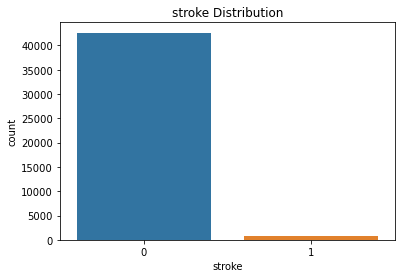

In [34]:
print(data['stroke'].value_counts())

# in percentage
print(data['stroke'].value_counts(normalize=True)*100)

# by visualizing
sns.countplot(x='stroke', data=data)
plt.title('stroke Distribution')
plt.show()

<h3 style="color: blue">As we can see above that almost 98% of the instances in our target variable haven't experienced with 'stroke'.

On the other hand 2% of the instances in our target variable go through 'Stroke'

So it is clear that dataset is  an imbalanced data.</h3>

# Data Cleaning

In [35]:
duplicates = data[data.duplicated()]
print(len(duplicates))

0


## Handling Null Values

In [36]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [8]:
# here i am repalcing the na values  of bmi with median
median_value = data['bmi'].median()
data['bmi'] = data['bmi'].fillna(median_value)

In [9]:
data["smoking_status"].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [10]:
data["smoking_status"] = data["smoking_status"].fillna("unknown")
data["smoking_status"].value_counts()

smoking_status
never smoked       16053
unknown            13292
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [37]:
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

<h1 style="color:red"> EDA Process</h1>

In [51]:
def EDA(df):
    print("\nSummary Statistics:")
    print(df.describe())

    # Visualize distribution of numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature].dropna(), kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # correlation matrix
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()


Summary Statistics:
                 id        gender           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350      0.408894     42.217894      0.093571       0.047512   
std    21072.134879      0.492151     22.519649      0.291235       0.212733   
min        1.000000      0.000000      0.080000      0.000000       0.000000   
25%    18038.500000      0.000000     24.000000      0.000000       0.000000   
50%    36351.500000      0.000000     44.000000      0.000000       0.000000   
75%    54514.250000      1.000000     60.000000      0.000000       0.000000   
max    72943.000000      2.000000     82.000000      1.000000       1.000000   

       ever_married     work_type  Residence_type  avg_glucose_level  \
count  43400.000000  43400.000000    43400.000000       43400.000000   
mean       0.643733      2.185438        0.501290         104.482750   
std        0.478901      1.093158        0

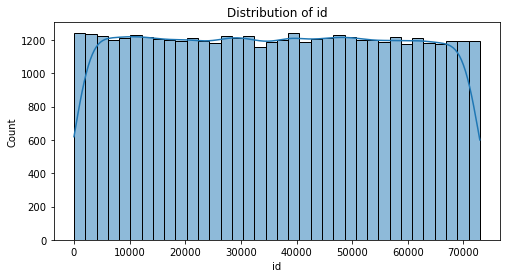

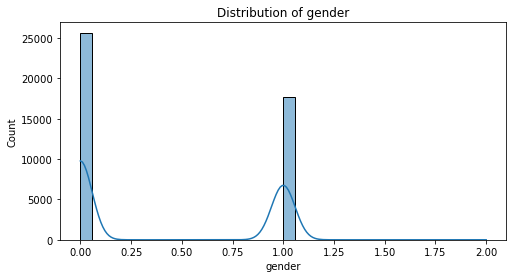

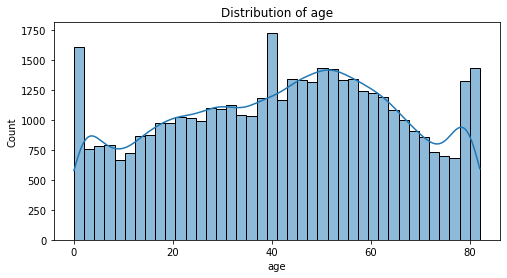

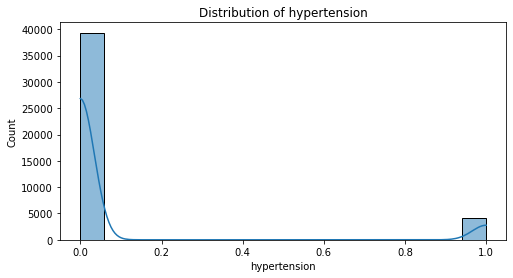

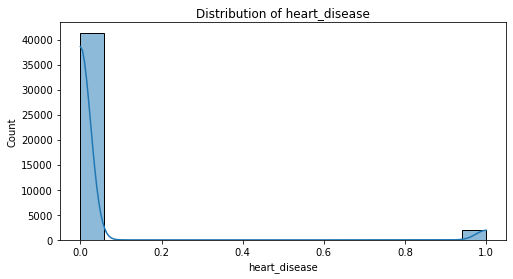

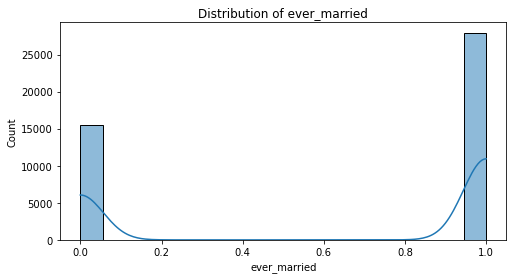

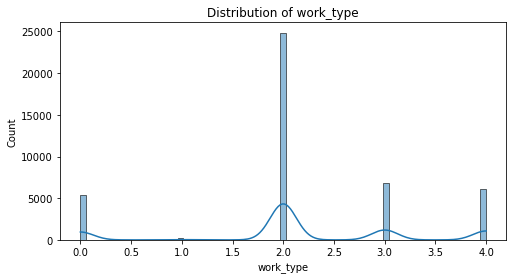

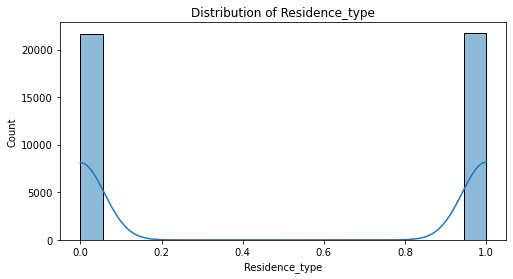

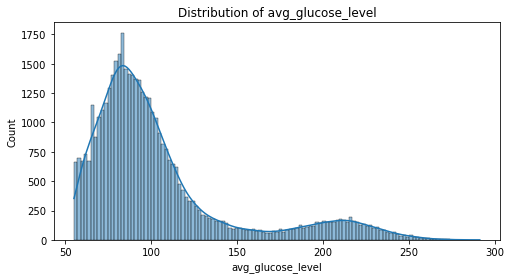

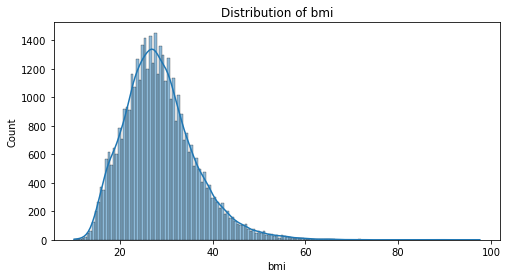

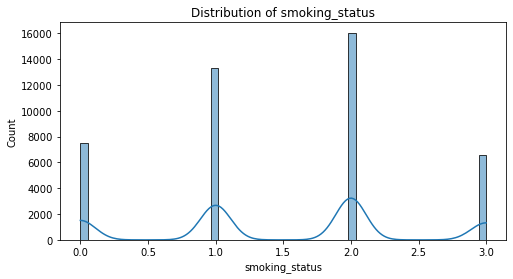

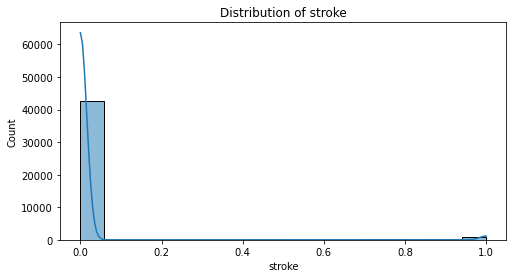

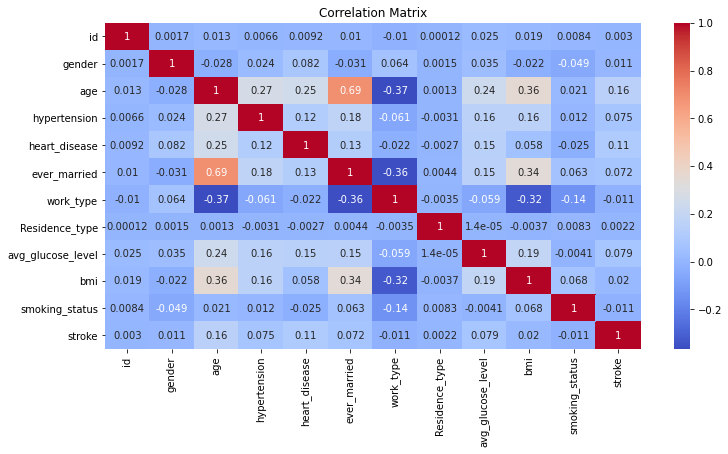

In [52]:
EDA(data)

In [42]:
# checking columns name
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

objList1 = data.select_dtypes(include = "object").columns # only columns with object datatypes
print (objList1)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [44]:
# now here i have to transform them
for i in objList1:
    data[i] = LE.fit_transform(data[i].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  int32  
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  int32  
 6   work_type          43400 non-null  int32  
 7   Residence_type     43400 non-null  int32  
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     43400 non-null  int32  
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 3.1 MB
None


In [45]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<h1 style="color:green">Correlation Heatmap Analysis</h1>

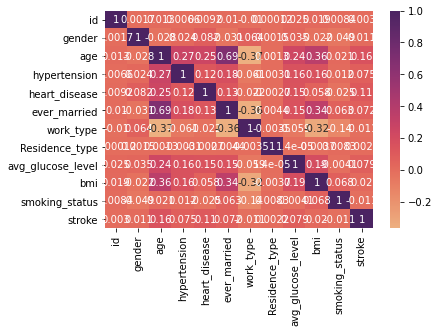

In [53]:
sns.heatmap(data.corr(), annot=True,cmap='flare');

In [47]:
data.describe()

id        gender           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350      0.408894     42.217894      0.093571       0.047512   
std    21072.134879      0.492151     22.519649      0.291235       0.212733   
min        1.000000      0.000000      0.080000      0.000000       0.000000   
25%    18038.500000      0.000000     24.000000      0.000000       0.000000   
50%    36351.500000      0.000000     44.000000      0.000000       0.000000   
75%    54514.250000      1.000000     60.000000      0.000000       0.000000   
max    72943.000000      2.000000     82.000000      1.000000       1.000000   

       ever_married     work_type  Residence_type  avg_glucose_level  \
count  43400.000000  43400.000000    43400.000000       43400.000000   
mean       0.643733      2.185438        0.501290         104.482750   
std        0.478901      1.093158        0.500004          43.111751   
min        0.000000      0.000000        0.000000          55.000000   
25%        0.000000      2.000000        0.000000          77.540000   
50%        1.000000      2.000000        1.000000          91.580000   
75%        1.000000      3.000000        1.000000         112.070000   
max        1.000000      4.000000        1.000000         291.050000   

                bmi  smoking_status        stroke  
count  41938.000000    43400.000000  43400.000000  
mean      28.605038        1.499631      0.018041  
std        7.770020        0.947479      0.133103  
min       10.100000        0.000000      0.000000  
25%       23.200000        1.000000      0.000000  
50%       27.700000        2.000000      0.000000  
75%       32.900000        2.000000      0.000000  
max       97.600000        3.000000      1.000000

# Encoding the Categorical data points

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_features = data[["gender", "hypertension", "heart_disease", "ever_married",
                       "work_type", "Residence_type", "smoking_status","stroke"]]

label_encoder = LabelEncoder()

for feature in categorical_features:
    data.loc[:, feature] = label_encoder.fit_transform(data[feature])

In [13]:
data.head()

gender   age  hypertension  heart_disease ever_married work_type  \
0      1   3.0             0              0            0         4   
1      1  58.0             1              0            1         2   
2      0   8.0             0              0            0         2   
3      0  70.0             0              0            1         2   
4      1  14.0             0              0            0         1   

  Residence_type  avg_glucose_level   bmi smoking_status  stroke  
0              0              95.12  18.0              3       0  
1              1              87.96  39.2              1       0  
2              1             110.89  17.6              3       0  
3              0              69.04  35.9              0       0  
4              0             161.28  19.1              3       0

#  Feature Selection Techniques
<ul style="color:red">
    <li>Filter Methods</li>
    <li>Wrapper Methods</li>
    <li>PCA</li>
    <ul>

In [49]:
def filter_methods(X, y):
    # Apply Chi-square Test
    chi2_selector = SelectKBest(chi2, k=10)
    X_chi2 = chi2_selector.fit_transform(X, y)
    
    # Apply Variance Threshold
    vt_selector = VarianceThreshold(threshold=0.1)
    X_vt = vt_selector.fit_transform(X)
    
    # Apply Covariance/Mutual Information
    mi_selector = SelectKBest(mutual_info_classif, k=10)
    X_mi = mi_selector.fit_transform(X, y)
    
    return X_chi2, X_vt, X_mi

In [50]:
def wrapper_methods(X, y):
    # Apply SelectKBest with chi2 scoring function
    selector = SelectKBest(score_func=chi2, k=10)
    X_selected = selector.fit_transform(X, y)
    return X_selected

In [14]:
X = data.drop(columns=[label])
y = data[label]

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [15]:
# Get feature importances by their scorees using from model
from sklearn.feature_selection import SelectFromModel

feature_importances = dt_classifier.feature_importances_
feature_importances

array([0.03081209, 0.13681929, 0.03527201, 0.00491646, 0.01505064,
       0.05502316, 0.02418872, 0.40511038, 0.24574657, 0.04706067])

In [16]:
# Select features based on importance scores
selected_features = SelectFromModel(dt_classifier, threshold=0.05)  # Adjust threshold as needed
selected_features.fit(X, y)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.05)

In [17]:
# Get selected feature indices
selected_feature_indices = selected_features.get_support(indices=True)
selected_feature_indices

array([1, 7, 8], dtype=int64)

In [18]:
# # Select the features from the original dataset
selected_X = X.iloc[:, selected_feature_indices]
selected_X.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [19]:
selected_X.head()

age  avg_glucose_level   bmi
0   3.0              95.12  18.0
1  58.0              87.96  39.2
2   8.0             110.89  17.6
3  70.0              69.04  35.9
4  14.0             161.28  19.1

# Data Transformation

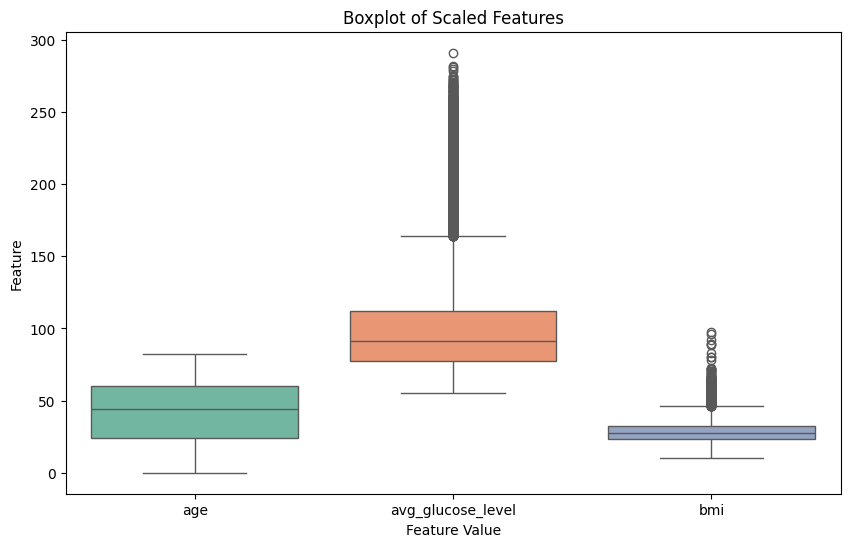

In [20]:
def plot_box(df):
    # Plot boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient="v", palette="Set2")
    plt.title("Boxplot of Scaled Features")
    plt.xlabel("Feature Value")
    plt.ylabel("Feature")
    plt.show()

plot_box(selected_X)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(selected_X)

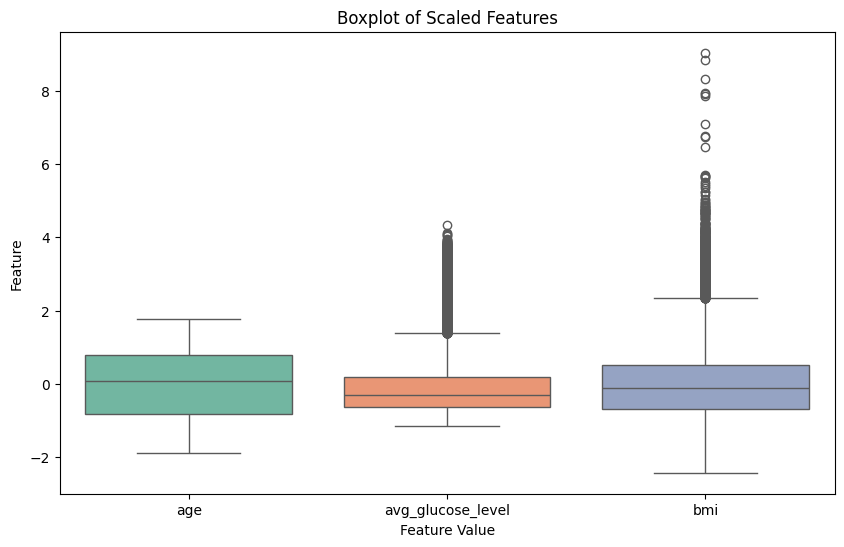

In [22]:
import pandas as pd
df_scaled = pd.DataFrame(X_scaled, columns=selected_X.columns)
plot_box(df_scaled)


<h1 style="color: blue;">Selected Classifcation Models:</h1>
  <ol>
    <h3><li style="color: green;">KNN</li></h3>
   <h3><li style="color: green;">SVM </li></h3>
    <h3><li style="color: green;">Naive Bayes</li></h3>
   <h3><li style="color: green;">Decision Tree</li></h3>
    <h3><li style="color: green;">Logistic Regression</li></h3>
  </ol>

In [23]:
def get_split(X, y):
    return train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)
X = X_scaled

<h1 style="color: indigo;">Function : Confusion matrix</h1>

In [24]:
def plot_cm(cm):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

<h1 style="color: indigo;">Function: Classification Report & Confusion Matric</h1>

In [25]:
def train_test_visualize(model, X, y, cv=5):
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    plot_cm(cm)
    # Generate classification report
    report = classification_report(y, y_pred, zero_division=1)
    print("Classification Report:\n", report)
    return accuracy_score(y, y_pred)

In [26]:
# X_train, X_test, y_train, y_test = get_split(X, y)

<h1 style="color: Red;">Baseline Execution</h1>

<h2 style="color: blue;">1- KNN</h2>

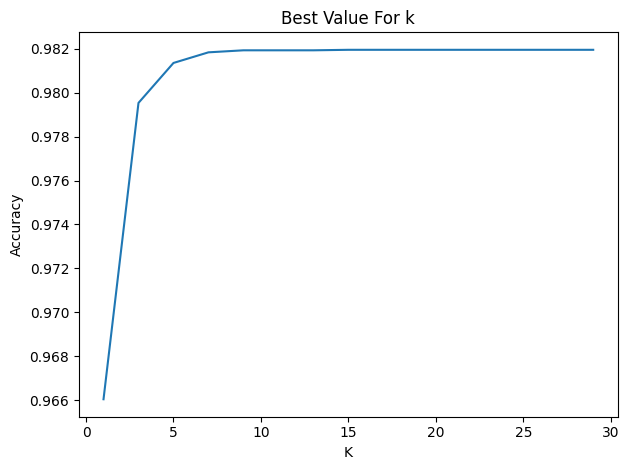

In [29]:
def plot_knn(X, y):
  # Define a list of k values to try
  k_values = range(1, 30, 2)

  # Train KNN classifiers with different k values
  scores = list()
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    score = accuracy_score(y, y_pred)
    scores.append(score)

  plt.plot(k_values, scores)
  plt.title("Best Value For k")
  plt.xlabel('K')
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

  return k_values[scores.index(max(scores))]
k = plot_knn(X, y)

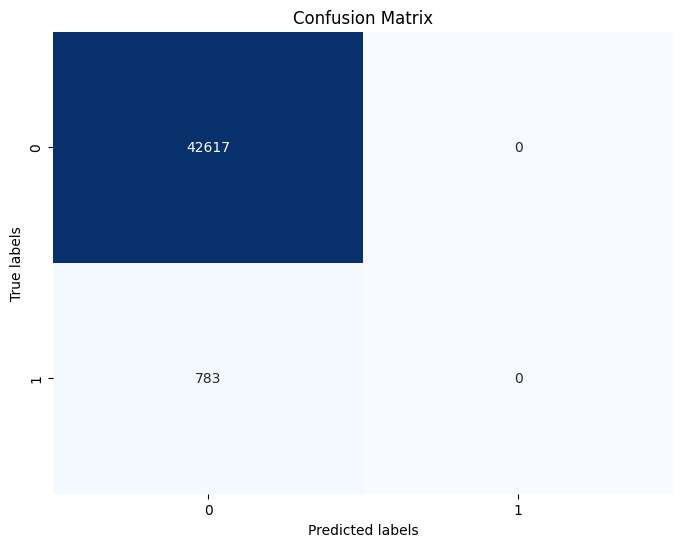

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     42617
           1       1.00      0.00      0.00       783

    accuracy                           0.98     43400
   macro avg       0.99      0.50      0.50     43400
weighted avg       0.98      0.98      0.97     43400



In [30]:
def run_knn(X, y):
  knn = KNeighborsClassifier(n_neighbors=k)
  train_test_visualize(knn, X, y)

run_knn(X, y)

<h2 style="color: blue;">2- Logistic Regression</h2>

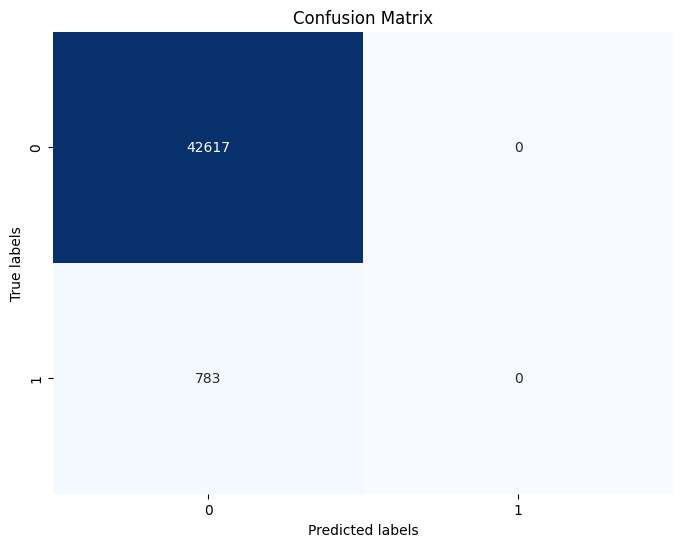

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     42617
           1       1.00      0.00      0.00       783

    accuracy                           0.98     43400
   macro avg       0.99      0.50      0.50     43400
weighted avg       0.98      0.98      0.97     43400



In [31]:
def run_lr(X, y):
  lr = LogisticRegression(max_iter=500)
  train_test_visualize(lr, X, y)

run_lr(X, y)

<h2 style="color: blue;">3- Decision Tree Classifier</h2>

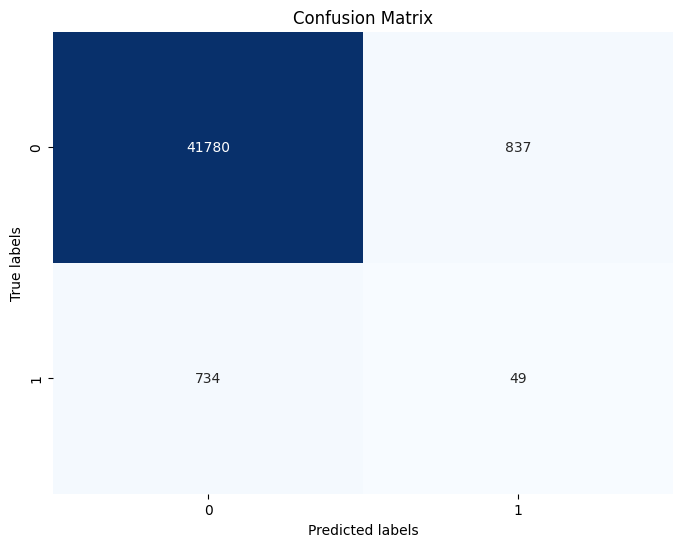

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     42617
           1       0.06      0.06      0.06       783

    accuracy                           0.96     43400
   macro avg       0.52      0.52      0.52     43400
weighted avg       0.97      0.96      0.96     43400



In [32]:
from sklearn.tree import DecisionTreeClassifier

def run_tree(X, y):
  tree_model = DecisionTreeClassifier()
  train_test_visualize(tree_model, X, y)

run_tree(X, y)

<h2 style="color: blue;">4- SVM</h2>

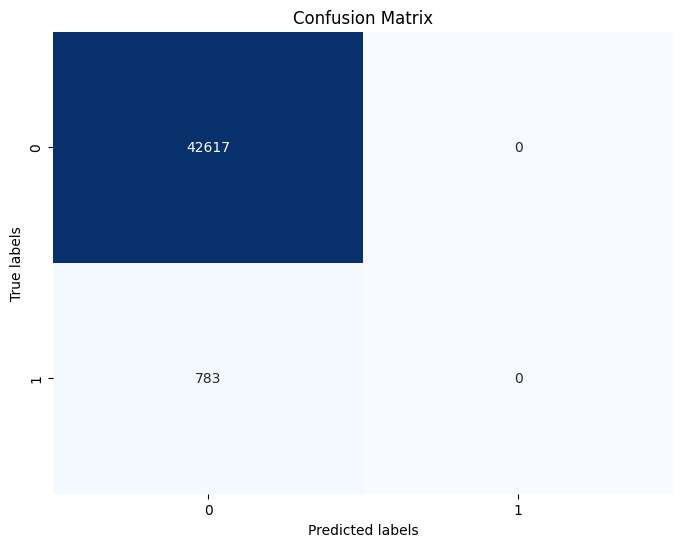

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     42617
           1       1.00      0.00      0.00       783

    accuracy                           0.98     43400
   macro avg       0.99      0.50      0.50     43400
weighted avg       0.98      0.98      0.97     43400



In [33]:
from sklearn.svm import SVC

def run_svm(X, y):
  # Initialize SVM classifier
  svm_model = SVC(kernel='linear')

  train_test_visualize(svm_model, X, y)

run_svm(X, y)

<h2 style="color: blue;">5- Naive Bayes</h2>

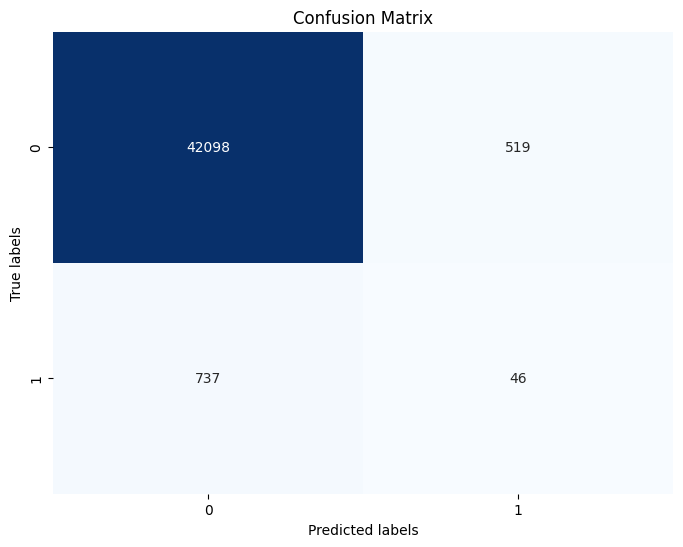

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     42617
           1       0.08      0.06      0.07       783

    accuracy                           0.97     43400
   macro avg       0.53      0.52      0.53     43400
weighted avg       0.97      0.97      0.97     43400



In [34]:
from sklearn.naive_bayes import GaussianNB

def run_nb(X, y):
    nb_classifier = GaussianNB()
    train_test_visualize(nb_classifier, X, y)

run_nb(X, y)

<h1 style="color: red;">Class Imbalance Technique</h1>
<h2 style="color: blue;"> Clustering Based Sampling</h2>

In [35]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=k)
X_res, y_res = sm.fit_resample(X, y)

In [36]:
X = X_res
y = y_res

<h2 style="color: blue;">KNN</h2>

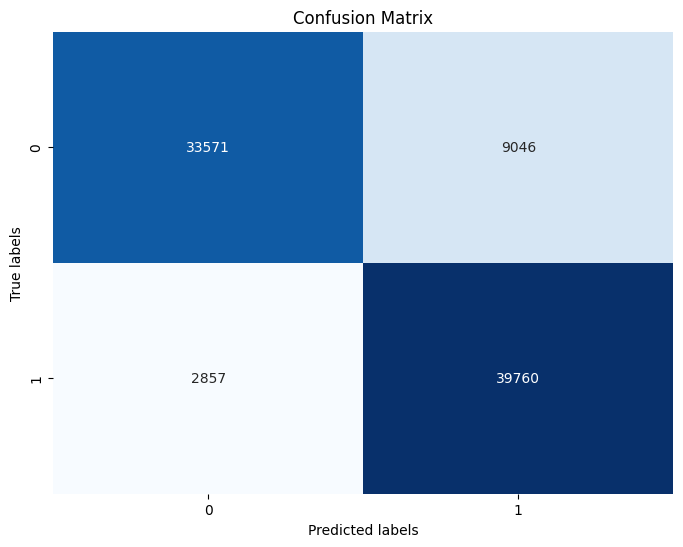

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     42617
           1       0.81      0.93      0.87     42617

    accuracy                           0.86     85234
   macro avg       0.87      0.86      0.86     85234
weighted avg       0.87      0.86      0.86     85234



In [37]:
run_knn(X, y)

<h2 style="color: blue;">Logistic Regression</h2>

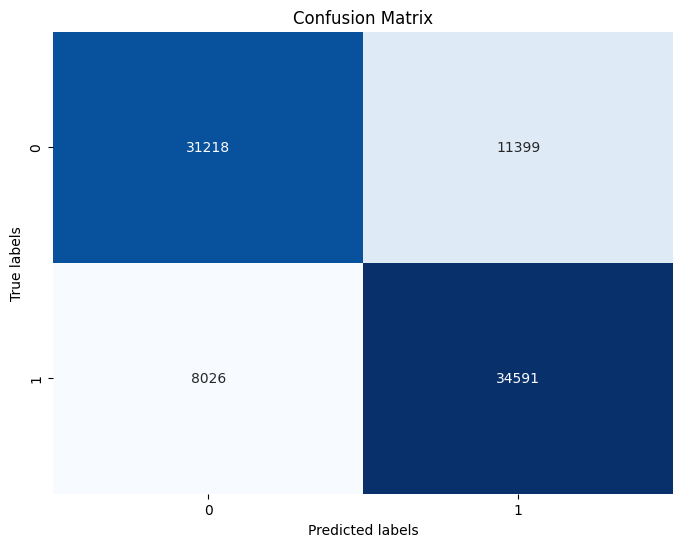

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76     42617
           1       0.75      0.81      0.78     42617

    accuracy                           0.77     85234
   macro avg       0.77      0.77      0.77     85234
weighted avg       0.77      0.77      0.77     85234



In [38]:
run_lr(X, y)

<h2 style="color: blue;"> Decision Tree</h2>

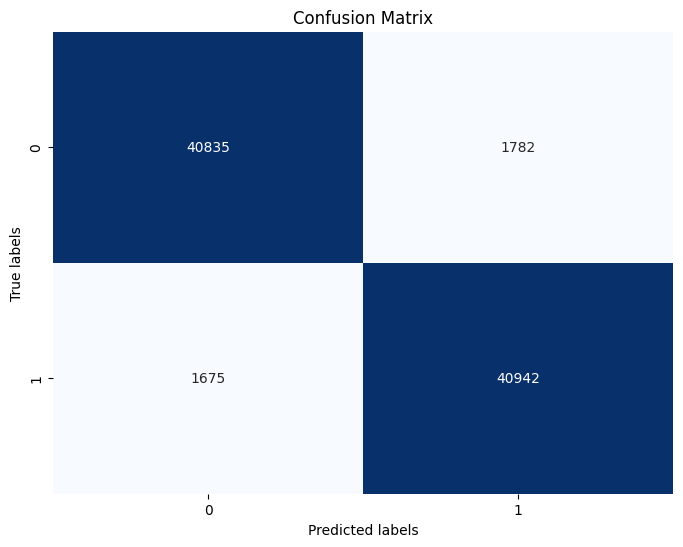

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     42617
           1       0.96      0.96      0.96     42617

    accuracy                           0.96     85234
   macro avg       0.96      0.96      0.96     85234
weighted avg       0.96      0.96      0.96     85234



In [39]:
run_tree(X, y)

<h2 style="color: blue;"> SVM</h2>

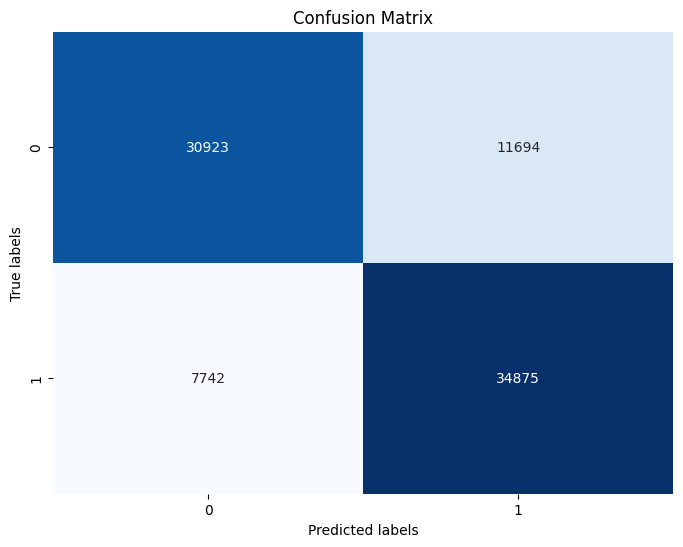

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76     42617
           1       0.75      0.82      0.78     42617

    accuracy                           0.77     85234
   macro avg       0.77      0.77      0.77     85234
weighted avg       0.77      0.77      0.77     85234



In [40]:
run_svm(X, y)

<h2 style="color: blue;"> Naive Bayes</h2>

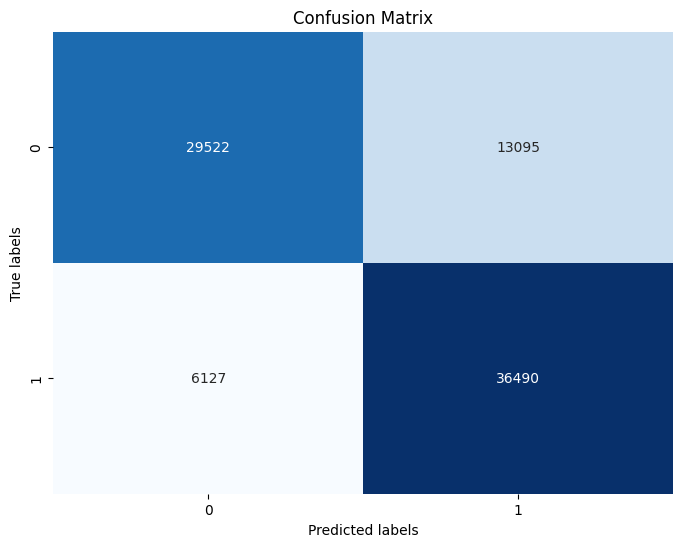

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75     42617
           1       0.74      0.86      0.79     42617

    accuracy                           0.77     85234
   macro avg       0.78      0.77      0.77     85234
weighted avg       0.78      0.77      0.77     85234



In [41]:
run_nb(X, y)

<h1 style="color: blue;"> Conclusion</h1>

 <h3 style="color:green"> -> As per my analysis the initial models including KNN, logistic regression, decision tree, SVM, and naive Bayes exhibited high precision for the majority class (0) but significantly underperformed for the minority class (1) with near zero recall and f1-scores. This indicated severe class imbalance issues where the models were biased towards predicting the majority class correctly but failed to identify instances of the minority class. <br><br>
    -> But as soon as i apply clustering-based SMOTE to address the imbalance the substantial improvements were observed across all models. KNN model showed a balanced performance with precision, recall, and f1-scores of around 0.87 for both classes, leading to an overall accuracy of 86%. <br>
    Logistic regression and SVM also improved achieving balanced macro and weighted averages around 0.77. The decision tree demonstrated a remarkable enhancement with an accuracy of 96% maintaining high precision and recall for both classes. <br>
    Naive Bayes  not as robust as the decision tree still showed significant improvement with balanced performance metrics around 0.77 to 0.79. <br><br>
    -> So from all these results underscore the effectiveness of clustering-based SMOTE in mitigating class imbalance thereby enabling the models to better identify and predict instances of the minority class leading to more reliable and equitable performance.
 </h3>